In [1]:
import numpy as np
import matplotlib.pyplot as plt
import eispac
import sunpy 
import sunpy.map
import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter

In [2]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14,
                  bbox_to_anchor=(1.02, 0., 1, 1)):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

In [3]:
data_filepath = "../../src/EIS/DHB_007_v2/20221020T0343/eis_20221020_034349.data.h5"

In [4]:
fe_12_195_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T0343/eis_20221020_034349.fe_12_195_119.1c-0.fit.h5"
fe_12_195_2c_fitpath = "../../src/EIS/DHB_007_v2/20221020T0343/eis_20221020_034349.fe_12_195_119.2c-0.fit.h5"
fe_13_202_1c_fitpath = "../../src/EIS/DHB_007_v2/20221020T0343/eis_20221020_034349.fe_13_202_044.1c-0.fit.h5"

In [5]:
fe_12_195_1c_fitres = eispac.read_fit(fe_12_195_1c_fitpath)
fe_12_195_2c_fitres = eispac.read_fit(fe_12_195_2c_fitpath)
fe_13_202_1c_fitres = eispac.read_fit(fe_13_202_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T0343/eis_20221020_034349.fe_12_195_119.1c-0.fit.h5
Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T0343/eis_20221020_034349.fe_12_195_119.2c-0.fit.h5
Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221020T0343/eis_20221020_034349.fe_13_202_044.1c-0.fit.h5


In [6]:
fe_12_195_1c_intmap = fe_12_195_1c_fitres.get_map(component=0, measurement="intensity")
fe_12_195_2c_intmap = fe_12_195_2c_fitres.get_map(component=0, measurement="intensity")

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


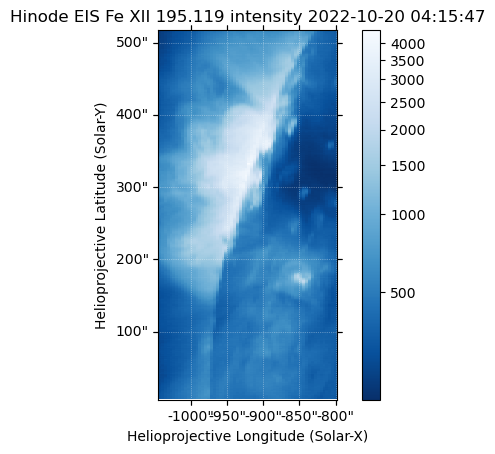

In [30]:
fe_12_195_1c_intmap.plot()
plt.colorbar()

(<matplotlib.colorbar.Colorbar at 0x7f6da131da10>, <AxesHostAxes: >)

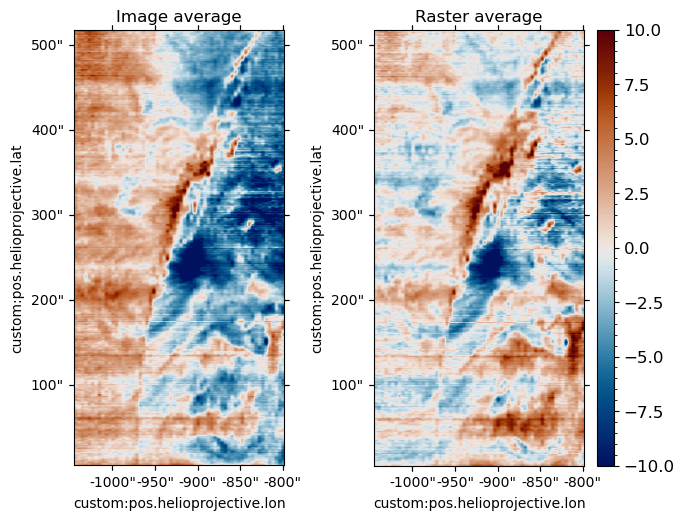

In [8]:
fig = plt.figure(figsize=(6,6), constrained_layout=True)

ax1 = fig.add_subplot(1,2,1,projection=fe_12_195_1c_intmap)
ax1.imshow(fe_12_195_1c_fitres.calculate_velocity(corr_method="image")[0],origin="lower",cmap=cmcm.vik,vmin=-10,vmax=10,
           aspect=fe_12_195_1c_fitres.meta["aspect"])
ax1.set_title("Image average")


ax2 = fig.add_subplot(1,2,2,projection=fe_12_195_1c_intmap)
ax2.imshow(fe_12_195_1c_fitres.calculate_velocity(corr_method="column")[0],origin="lower",cmap=cmcm.vik,vmin=-10,vmax=10,
           aspect=fe_12_195_1c_fitres.meta["aspect"])
ax2.set_title("Raster average")

plot_colorbar(ax=ax2,im=ax1.images[0], width="8%",bbox_to_anchor=(1.06, 0., 1, 1),fontsize=12)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


(<matplotlib.colorbar.Colorbar at 0x7f6da1396b90>, <AxesHostAxes: >)

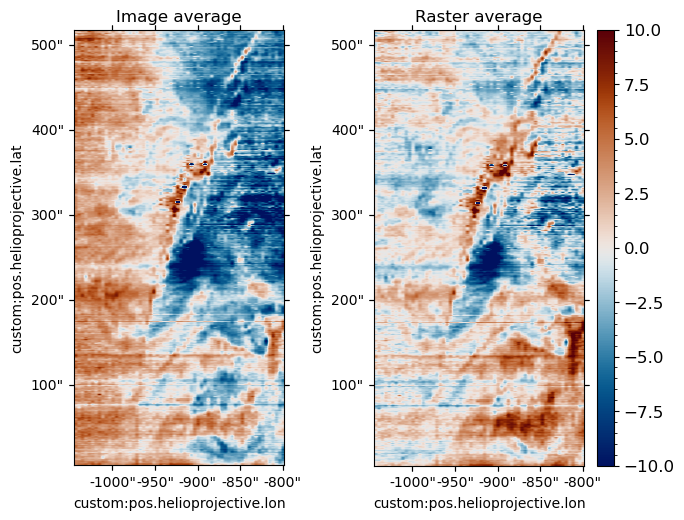

In [9]:
fig = plt.figure(figsize=(6,6), constrained_layout=True)

ax1 = fig.add_subplot(1,2,1,projection=fe_12_195_2c_intmap)
ax1.imshow(fe_12_195_2c_fitres.calculate_velocity(corr_method="image")[0],origin="lower",cmap=cmcm.vik,vmin=-10,vmax=10,
           aspect=fe_12_195_2c_fitres.meta["aspect"])
ax1.set_title("Image average")

ax2 = fig.add_subplot(1,2,2,projection=fe_12_195_2c_intmap)
ax2.imshow(fe_12_195_2c_fitres.calculate_velocity(corr_method="column")[0],origin="lower",cmap=cmcm.vik,vmin=-10,vmax=10,
           aspect=fe_12_195_2c_fitres.meta["aspect"])
ax2.set_title("Raster average")
plot_colorbar(ax=ax2,im=ax1.images[0], width="8%",bbox_to_anchor=(1.06, 0., 1, 1),fontsize=12)

In [13]:
fe_12_195_1c_lwmap = fe_12_195_1c_fitres.get_map(component=0, measurement="width")

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


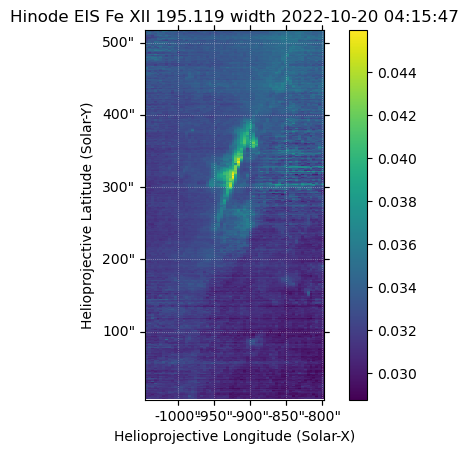

In [27]:
fe_12_195_1c_lwmap.plot()
plt.colorbar()

In [25]:
0.064/np.sqrt(4*np.log(2))

0.0384359170811664

In [32]:
fe_12_195_1c_fitres.meta

{'aspect': 0.2504006624221802,
 'aspect_ratio': 0.2504006624221802,
 'ccd_offset': array([16.228622, 16.226858, 16.225092, 16.223328, 16.221563, 16.219797,
        16.218033, 16.216269, 16.214502, 16.212738, 16.210974, 16.209208,
        16.207443, 16.205679, 16.203913, 16.202148, 16.200384, 16.198618,
        16.196854, 16.19509 , 16.193325, 16.191559, 16.189795, 16.18803 ],
       dtype=float32),
 'date_obs': array(['2022-10-20T04:46:45.363', '2022-10-20T04:45:43.480',
        '2022-10-20T04:44:41.609', '2022-10-20T04:43:39.629',
        '2022-10-20T04:42:37.762', '2022-10-20T04:41:35.799',
        '2022-10-20T04:40:33.854', '2022-10-20T04:39:31.955',
        '2022-10-20T04:38:30.100', '2022-10-20T04:37:28.174',
        '2022-10-20T04:36:26.070', '2022-10-20T04:35:24.166',
        '2022-10-20T04:34:22.285', '2022-10-20T04:33:20.414',
        '2022-10-20T04:32:18.523', '2022-10-20T04:31:16.502',
        '2022-10-20T04:30:14.633', '2022-10-20T04:29:12.787',
        '2022-10-20T04:28:10

In [10]:
fe_13_202_1c_intmap = fe_13_202_1c_fitres.get_map(component=0, measurement="intensity")
fe_13_202_1c_velmap_image_corr = fe_13_202_1c_fitres.get_map(component=0, measurement="vel",corr_method="image")
fe_13_202_1c_velmap_col_corr = fe_13_202_1c_fitres.get_map(component=0, measurement="vel",corr_method="column")

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


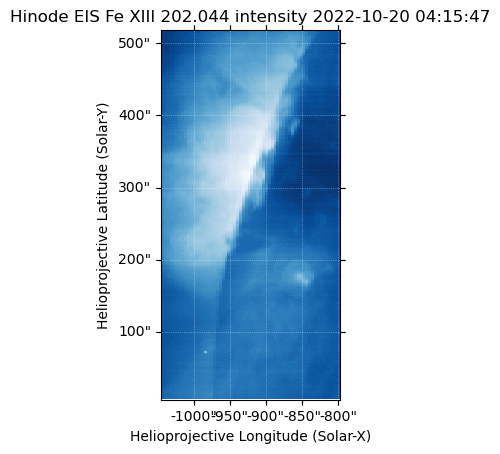

In [11]:
fe_13_202_1c_intmap.plot()

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


(<matplotlib.colorbar.Colorbar at 0x7f6d9aff6b90>, <AxesHostAxes: >)

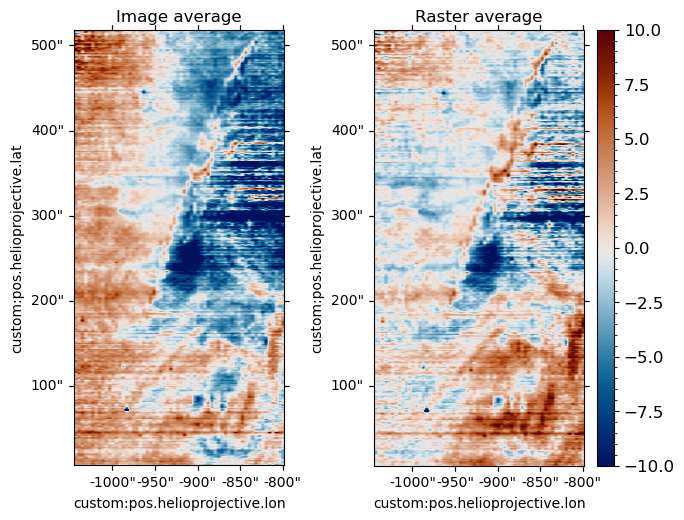

In [12]:
fig = plt.figure(figsize=(6,6), constrained_layout=True)

ax1 = fig.add_subplot(1,2,1,projection=fe_13_202_1c_velmap_image_corr)
ax1.imshow(fe_13_202_1c_fitres.calculate_velocity(corr_method="image")[0],origin="lower",cmap=cmcm.vik,vmin=-10,vmax=10,
           aspect=fe_13_202_1c_fitres.meta["aspect"])
ax1.set_title("Image average")

ax2 = fig.add_subplot(1,2,2,projection=fe_13_202_1c_intmap)
ax2.imshow(fe_13_202_1c_fitres.calculate_velocity(corr_method="column")[0],origin="lower",cmap=cmcm.vik,vmin=-10,vmax=10,
           aspect=fe_13_202_1c_fitres.meta["aspect"])
ax2.set_title("Raster average") 
plot_colorbar(ax=ax2,im=ax1.images[0], width="8%",bbox_to_anchor=(1.06, 0., 1, 1),fontsize=12)